#### GRASP x INTEGER LINEAR PROGRAM RESULTS COMPARISON (NOT PRESENTED IN THE PAPER)

In [64]:
from pathlib import PurePath
results_path = PurePath("..") / "grasp_src" / "1con_ilp_comp_results" / "results"
total_cells = 4225
time_grasp = {}
obj_grasp = {}
for p in [0.01, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:

    num_rsus = int(total_cells * p)    
    summary_path = results_path / f"rsu={num_rsus}_tau=30_rcl=15_iter=1000_cont=1_summary.txt"
    with open(summary_path, mode="r") as f:
        for line in f.readlines():
            if "TOTAL EXECUTION TIME" in line:
                time_grasp[num_rsus] = float(line[line.find(": ") + 2:])
            if "OBJECTIVE FUNCTION" in line:
                obj_grasp[num_rsus] = int(line[line.find(": ") + 2:])

In [65]:
import pickle

with open(PurePath("..") / "ilp_src" / "obj_ilp.pkl", "rb") as file:
    obj_ilp = pickle.load(file)

with open(PurePath("..") / "ilp_src" / "time_ilp.pkl", "rb") as file:
    time_ilp = pickle.load(file)

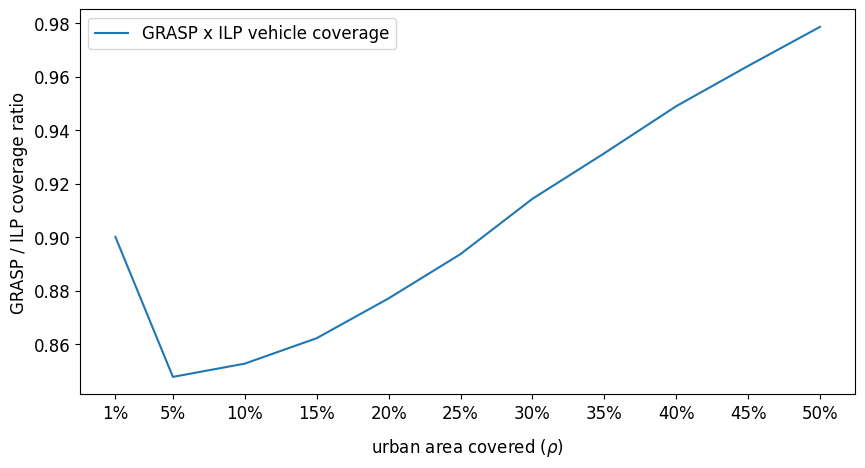

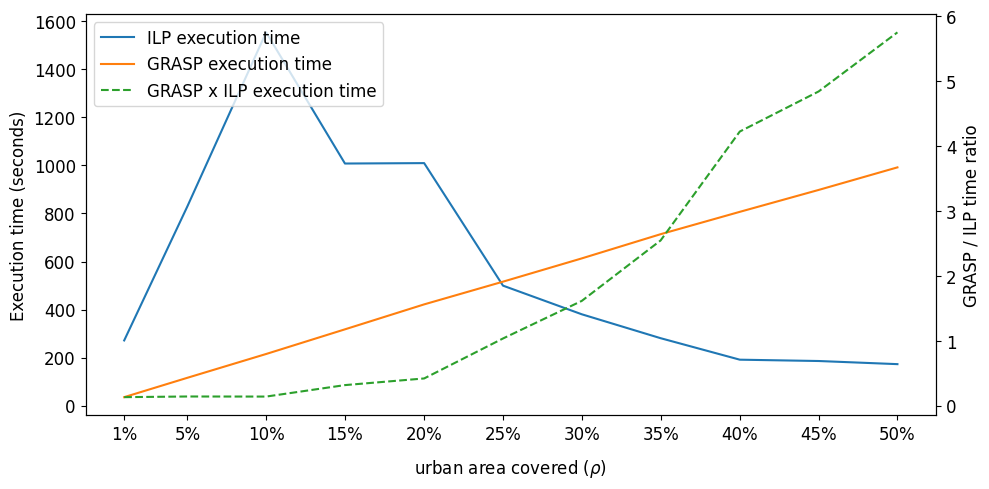

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

rho_list = [0.01, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50]
x = [int(rho * 4225) for rho in rho_list]

plt.plot(x, [obj_grasp[rho] / obj_ilp[rho] for rho in x], label="GRASP x ILP vehicle coverage")

plt.xlabel(r"urban area covered ($\rho$)", fontsize="large", labelpad=10)

plt.legend(loc="upper left", fontsize="large")

plt.ylabel("GRASP / ILP coverage ratio", fontsize="large")

ax = plt.gca()
ax.set_xticks(x)
ax.set_xticklabels([f'{int(rho * 100)}%' for rho in rho_list])

ax.tick_params("x", labelsize="large")
ax.tick_params("y", labelsize="large")

plt.savefig("grasp_vs_ilp_cov_ratio.pdf")
plt.savefig("grasp_vs_ilp_cov_ratio.png")

plt.show()



import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Primary axis
ax1 = plt.gca()

# Plot on primary y-axis (for actual times)
ax1.plot(x, [time_ilp[rho] for rho in x], label="ILP execution time", color="tab:blue")
ax1.plot(x, [time_grasp[rho] for rho in x], label="GRASP execution time", color="tab:orange")
ax1.set_ylabel("Execution time (seconds)", fontsize="large")
ax1.tick_params("y", labelsize="large")

# Twin axis (same x-axis, different y-axis for ratio)
ax2 = ax1.twinx()
ax2.plot(x, [time_grasp[rho] / time_ilp[rho] for rho in x], label="GRASP x ILP execution time", color="tab:green", linestyle="--")
ax2.set_ylabel("GRASP / ILP time ratio", fontsize="large")
ax2.tick_params("y", labelsize="large")

# Shared x-axis formatting
ax1.set_xlabel(r"urban area covered ($\rho$)", fontsize="large", labelpad=10)
ax1.set_xticks(x)
ax1.set_xticklabels([f'{int(rho * 100)}%' for rho in rho_list])
ax1.tick_params("x", labelsize="large")

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left", fontsize="large")

plt.tight_layout()

plt.savefig("grasp_vs_ilp_exec_time_ratio.pdf")
plt.savefig("grasp_vs_ilp_exec_time_ratio.png")

plt.show()


In [68]:
import pandas as pd

data = []

for rho in rho_list:
    key = int(rho * 4225)

    ilp_time = time_ilp[key]
    grasp_time = time_grasp[key]
    time_ratio = grasp_time / ilp_time if ilp_time != 0 else float("inf")

    ilp_cov = obj_ilp[key]
    grasp_cov = obj_grasp[key]
    coverage_ratio = grasp_cov / ilp_cov if ilp_cov != 0 else float("nan")

    data.append({
        "urban area covered (ρ)": f"{rho:.0%}",
        "ILP Time (s)": round(ilp_time, 3),
        "GRASP Time (s)": round(grasp_time, 3),
        "time Ratio (GRASP / ILP)": round(time_ratio, 3),
        "ILP Coverage": ilp_cov,
        "GRASP Coverage": grasp_cov,
        "coverage Ratio (GRASP / ILP)": round(coverage_ratio, 3)
    })

df = pd.DataFrame(data)
df

,urban area covered (ρ),ILP Time (s),GRASP Time (s),time Ratio (GRASP / ILP),ILP Coverage,GRASP Coverage,coverage Ratio (GRASP / ILP)
0,1%,271.274,35.097,0.129,8392.0,7554,0.900
1,5%,829.157,115.660,0.139,29448.0,24966,0.848
2,10%,1554.415,214.858,0.138,46004.0,39230,0.853
3,15%,1008.106,317.559,0.315,56867.0,49033,0.862
4,20%,1009.824,421.460,0.417,64169.0,56287,0.877
5,25%,499.580,516.052,1.033,68958.0,61628,0.894
6,30%,380.232,613.001,1.612,72029.0,65859,0.914
7,35%,280.647,713.798,2.543,73896.0,68824,0.931
8,40%,191.143,806.905,4.221,74945.0,71124,0.949
9,45%,185.608,898.074,4.839,75386.0,72675,0.964
